In [1573]:
# Andy Vo
# 2/13/2022
# Homework 1


In [1574]:
# Tasks 1a and 1b
# - Take several pictures of red, blue, and green items with your phone or other digital cameras 
#   (or download some from the internet, if a camera isn’t available).
# - Load each image, and convert it to a tensor.
#____________________________________________________________________________________________________


# use imageio module to load an image
# specifies image dimensions (height, width, rgb channel)

import imageio
import torch

# ".../Images/Blue_image.jpeg"
# ".../Images/Blue_Image_2.jpeg"
# ".../Images/Green_image_2.jpeg"
# ".../Images/Green-Wallpaper-29.jpeg"
# ".../Images/Red_Image_3.jpeg"
# ".../Images/Red_Photo.jpeg"

img_arr = imageio.imread("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework1/Images/Blue_image.jpeg")
img_arr.shape


(3, 600, 600)

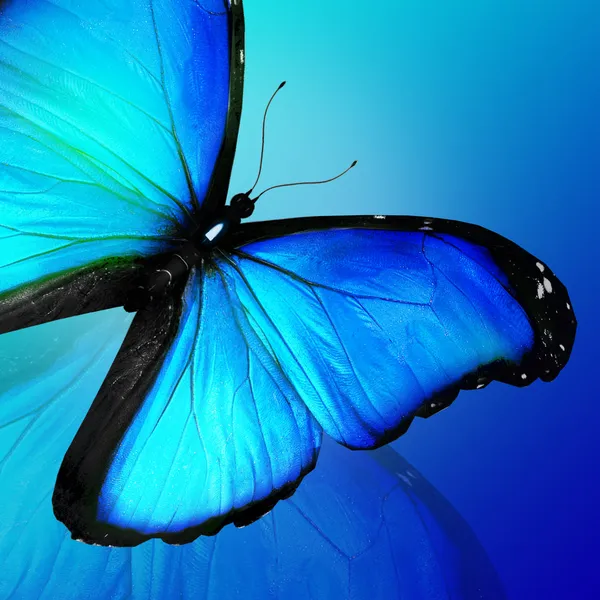

In [1575]:
# Read the image after importing the required libraries
from PIL import Image
import torchvision.transforms as transforms

# Read the image
# ".../Images/Blue_image.jpeg"
# ".../Images/Blue_Image_2.jpeg"
# ".../Images/Green_image_2.jpeg"
# ".../Images/Green-Wallpaper-29.jpeg"
# ".../Images/Red_Image_3.jpeg"
# ".../Images/Red_Photo.jpeg"


image = Image.open("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework1/Images/Blue_image.jpeg")
image


In [1576]:
# Define a transform to convert the image to tensor
transform = transforms.ToTensor()


In [1577]:
# Convert the image to PyTorch tensor
tensor = transform(image)

# print the converted image tensor
print(tensor)

# Convert image to PyTorch Tensor (Image Tensor)
print("Shape of Image Tensor:\n", tensor.shape)


# *************** End of tasks 1a and 1b ************************


tensor([[[0.0745, 0.0824,  ..., 0.0157, 0.0157],
         [0.0824, 0.0902,  ..., 0.0157, 0.0157],
         ...,
         [0.0549, 0.0588,  ..., 0.0275, 0.0275],
         [0.0471, 0.0588,  ..., 0.0275, 0.0275]],

        [[0.0863, 0.0980,  ..., 0.5373, 0.5373],
         [0.1020, 0.1137,  ..., 0.5373, 0.5373],
         ...,
         [0.5647, 0.5686,  ..., 0.0039, 0.0039],
         [0.5569, 0.5686,  ..., 0.0039, 0.0039]],

        [[0.1255, 0.1569,  ..., 0.7922, 0.7922],
         [0.1412, 0.1765,  ..., 0.7922, 0.7922],
         ...,
         [0.8314, 0.8353,  ..., 0.6353, 0.6353],
         [0.8196, 0.8353,  ..., 0.6353, 0.6353]]])
Shape of Image Tensor:
 torch.Size([3, 600, 600])


In [1578]:
# Task 1c, Find the tensor mean
mean = torch.mean(tensor)

# Print the computed mean 
print("Mean:", mean)

Mean: tensor(0.4367)


In [1579]:
# Task 1d, Find the mean of channels

# Compute mean of the Image Tensor across image channels RGB
Red_mean, Green_mean ,Blue_mean = torch.mean(tensor, dim = [1,2])

# print mean across image channel RGB
print("Mean across Red channel:", Red_mean)
print("Mean across Green channel:", Green_mean)
print("Mean across Blue channel:", Blue_mean)

Mean across Red channel: tensor(0.0763)
Mean across Green channel: tensor(0.4936)
Mean across Blue channel: tensor(0.7403)


In [1580]:
# Problem 2

# import necessary libraries
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)


# From Weather prediction example in notes
t_c = torch.tensor( [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

t_un = 0.1 * t_u

In [1581]:
# define a model for non-linear system
def model(t_u, w1,w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b


In [1582]:
# Calculate the average loss using absolute value

def loss_fn(t_p, t_c):
  abs_diffs = abs(t_p - t_c)
  return abs_diffs.mean()


In [1583]:
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [1584]:
# use for autograd
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

In [1585]:
params.grad is None

True

In [1586]:
# Check the value of the loss
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([5.1800e+01, 2.9408e+03, 1.0000e+00])

In [1587]:
if params.grad is not None:
    params.grad.zero_()

In [1588]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [1589]:
def dmodel_dw(t_u, w1, w2, b):
    return t_u

In [1590]:
def dmodel_db(t_u, w1, w2, b):
    return 1.0

In [1591]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [1592]:
# Use autograd to bypass the sizes of the models
# output the loss at every 500 epoch

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params



In [1593]:
# output the Epoch and Loss

training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)


Epoch 500, Loss 2.696081
Epoch 1000, Loss 2.342508
Epoch 1500, Loss 2.026555
Epoch 2000, Loss 1.720870
Epoch 2500, Loss 1.620686
Epoch 3000, Loss 1.631729
Epoch 3500, Loss 1.621878
Epoch 4000, Loss 1.626447
Epoch 4500, Loss 1.631015
Epoch 5000, Loss 1.621626


tensor([-0.9342,  0.5529, -0.8831], requires_grad=True)

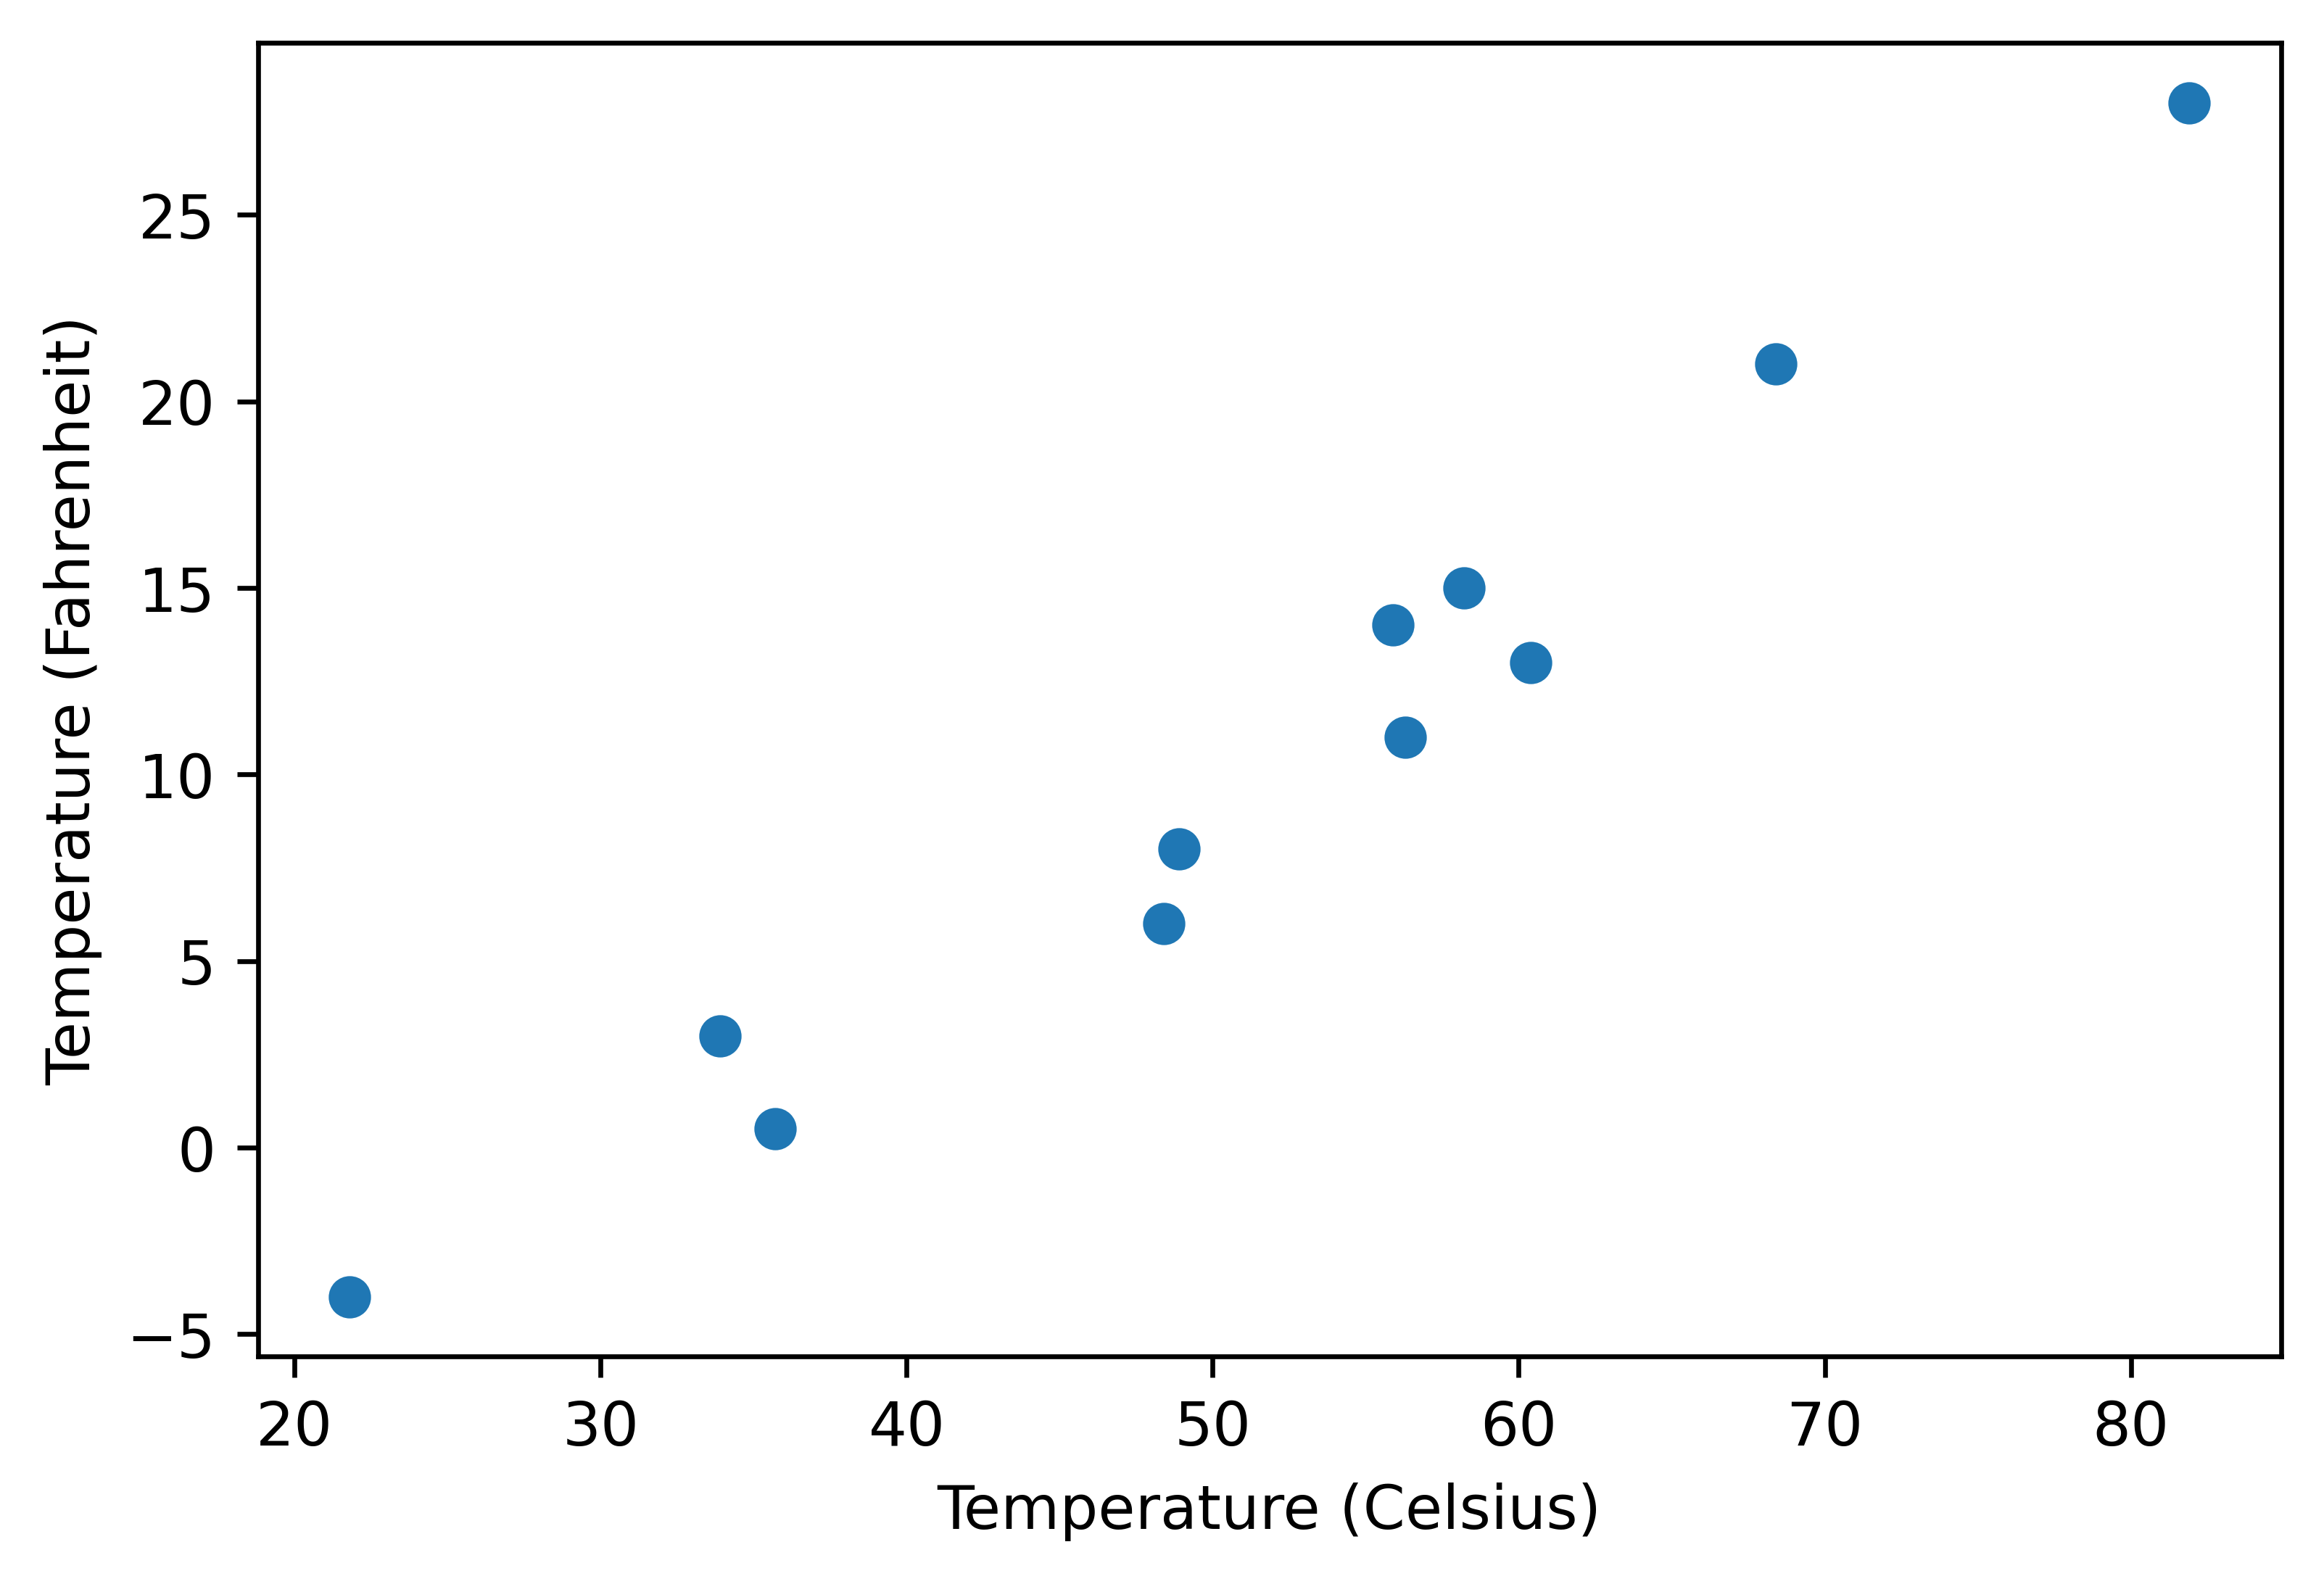

In [1594]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Temperature (Celsius)")
#plt.plot(t_u.numpy(), t_p.detatch().np())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()

In [1595]:
# Problem 3 
import numpy as np 
import pandas as pd 
 
# Data Visualisation 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 


In [1596]:

housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework1/Text_Files/Housing.csv")) 
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1597]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [1598]:
m = len(housing) 
m 

545

In [1599]:
housing.shape 

(545, 13)

In [1600]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [1601]:

housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [1602]:
# Columns as Features
X = housing[['area', 'bedrooms', 'bathrooms',
       'stories', 'parking']]


In [1603]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [1604]:
housing = housing.values

housing


array([[13300000, 7420, 4, ..., 2, 'yes', 'furnished'],
       [12250000, 8960, 4, ..., 3, 'no', 'furnished'],
       [12250000, 9960, 3, ..., 2, 'yes', 'semi-furnished'],
       ...,
       [1750000, 3620, 2, ..., 0, 'no', 'unfurnished'],
       [1750000, 2910, 3, ..., 0, 'no', 'furnished'],
       [1750000, 3850, 3, ..., 0, 'no', 'unfurnished']], dtype=object)

In [1605]:
# Task 3a - Develop tensor for the following variables:
# area, bedrooms, bathrooms, stories, parking

#_________________________________________________________


# Convert tc to a tensor for t_c input values

t_c = housing[:,1:5]
t_c1 = housing[:,10]

tc_tot = np.append(t_c, t_c1)

x_train = np.asarray(tc_tot).astype(np.float32)


tc_tot = torch.tensor(x_train)
tc_tot




tensor([7.4200e+03, 4.0000e+00,  ..., 0.0000e+00, 0.0000e+00])

In [1606]:
# Convert t_u to a tensor

t_u = housing[:,10]
t_u

y_train = np.asarray(t_u).astype(np.float32)

t_un = 0.1 * t_u

t_u = torch.tensor(y_train)
t_u

tensor([2., 3., 2., 3., 2., 2., 2., 0., 2., 1., 2., 2., 1., 2., 0., 2., 1., 2.,
        2., 1., 2., 2., 1., 1., 2., 2., 0., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
        1., 2., 2., 1., 0., 0., 2., 2., 1., 0., 1., 3., 1., 0., 1., 1., 1., 2.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 0., 0.,
        0., 0., 1., 0., 0., 0., 2., 0., 1., 1., 1., 0., 2., 0., 0., 2., 2., 2.,
        0., 2., 0., 3., 1., 2., 1., 1., 0., 0., 0., 1., 1., 0., 2., 0., 0., 0.,
        1., 1., 2., 2., 0., 2., 2., 2., 0., 0., 0., 2., 2., 0., 1., 0., 1., 2.,
        2., 0., 1., 2., 0., 0., 0., 0., 2., 0., 2., 1., 0., 2., 0., 1., 1., 0.,
        1., 0., 1., 1., 0., 0., 0., 2., 0., 0., 2., 2., 0., 1., 2., 0., 0., 0.,
        0., 0., 1., 0., 2., 2., 0., 0., 0., 1., 2., 0., 1., 2., 2., 0., 2., 2.,
        2., 1., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 2., 2., 2., 0., 0., 0.,
        2., 2., 0., 0., 2., 0., 2., 1., 

In [1607]:
# Calculate the average loss using absolute value

def loss_fn(t_p, tc_tot):
  abs_diffs = abs(t_p - tc_tot)
  return abs_diffs.mean()

In [1608]:
# define a model for linear regression

def model(t_u, w1,w2,w3,w4,w5,x1,x2,x3,x4,x5, b):
    return w5*x5 + w4*x4 + w3*x3 + w2*x2 + w1*x1 + b

In [1609]:
w1 = torch.ones(())
w2 = torch.ones(())
w3 = torch.ones(())
w4 = torch.ones(())
w5 = torch.ones(())

x1 = torch.ones(())
x2 = torch.ones(())
x3 = torch.ones(())
x4 = torch.ones(())
x5 = torch.ones(())

b = torch.zeros(())

t_p = model(t_u, w1, w2, w3,w4,w5,x1,x2,x3,x4,x5,b)
t_p

tensor(5.)

In [1610]:
# use for autograd
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

In [1611]:
# Check the value of the loss
loss = loss_fn(model(t_u, *params), tc_tot)
loss.backward()

params.grad

tensor([0.5949, 0.5949, 0.5949, 0.5949, 0.5949, 0.5949, 0.5949, 0.5949, 0.5949,
        0.5949, 0.5949])

In [1612]:
if params.grad is not None:
    params.grad.zero_()

In [1613]:
def dloss_fn(t_p, tc_tot):
    dsq_diffs = 2 * (t_p - tc_tot) / t_p.size(0)  # <1>
    return dsq_diffs

In [1614]:
def dmodel_dw(t_u, w1, w2, w3,w4,w5,x1,x2,x3,x4,x5,b):
    return t_u

In [1615]:
def dmodel_db(t_u, w1, w2, w3,w4,w5,x1,x2,x3,x4,x5,b):
    return 1.0

In [1616]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, tc_tot)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w1, w2, w3,w4,w5,x1,x2,x3,x4,x5,b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, w3,w4,w5,x1,x2,x3,x4,x5,b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [1617]:
# Use autograd to bypass the sizes of the models
# output the loss at every 500 epoch

def training_loop(n_epochs, learning_rate, params, t_u, tc_tot):
    for epoch in range(1, n_epochs + 1):
      w1,w2,w3,w4,w5,x1,x2,x3,x4,x5,b= params
      if params.grad is not None:  # <1>
            params.grad.zero_()
        
      t_p = model(t_u, *params) 
      loss = loss_fn(t_p, tc_tot)
      loss.backward()
        
      with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

      if epoch % 500 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [1618]:
# output the Epoch and Loss

training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-1, 
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    tc_tot = tc_tot)



Epoch 500, Loss 1030.477295
Epoch 1000, Loss 1030.465454
Epoch 1500, Loss 1030.454102
Epoch 2000, Loss 1030.466675
Epoch 2500, Loss 1030.475098
Epoch 3000, Loss 1030.464111
Epoch 3500, Loss 1030.455566
Epoch 4000, Loss 1030.455200
Epoch 4500, Loss 1030.459717
Epoch 5000, Loss 1030.462646


tensor([0.5285, 0.5285, 0.5285, 0.5285, 0.5285, 0.5285, 0.5285, 0.5285, 0.5285,
        0.5285, 0.6409], requires_grad=True)

In [1619]:
raw = (np.random.random(545) - 0.5).cumsum()
smooth = raw.reshape(-1,5).mean(axis=1)


t_u = np.linspace(0, 1, 545)
tc_tot = np.linspace(0, 1, 109)

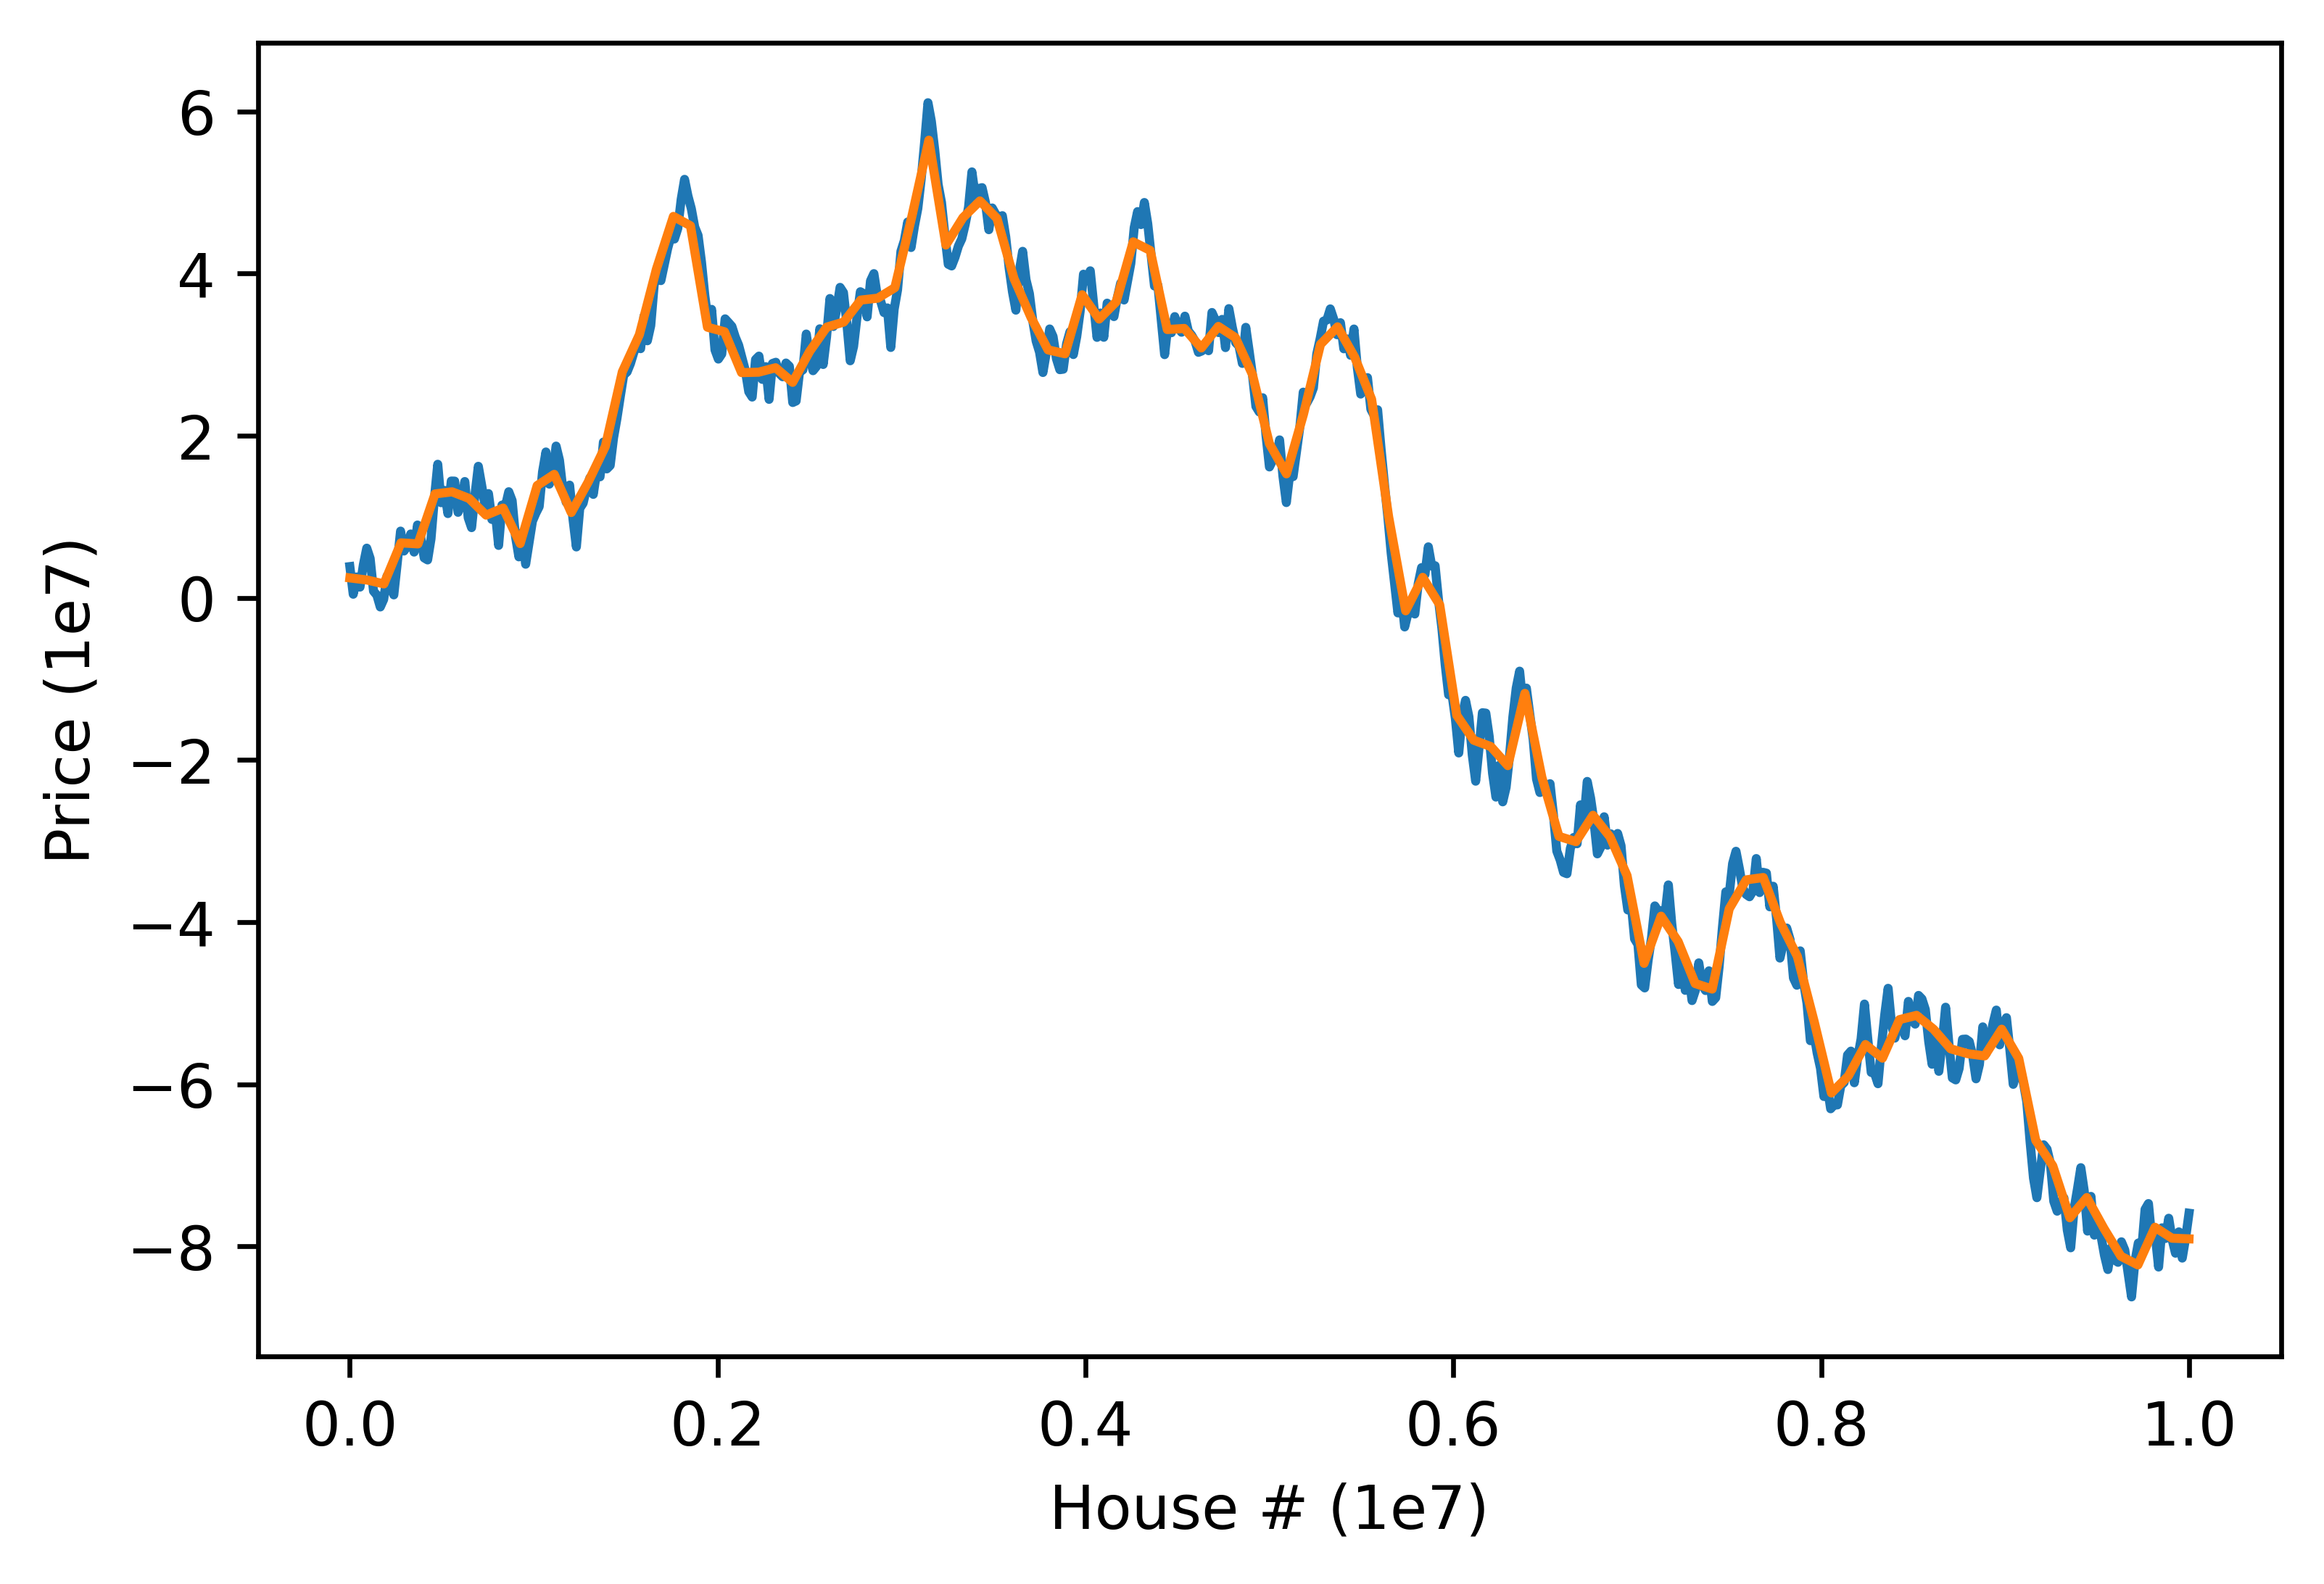

In [1620]:
fig = plt.figure(dpi=600)
plt.ylabel("Price (1e7)")
plt.xlabel("House # (1e7)")
plt.plot(t_u, raw)
plt.plot(tc_tot, smooth)
plt.show()